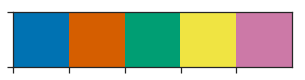

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

Trends are downloaded from http://dan.corlan.net/medline-trend.html

In [40]:
all_refs = pd.read_csv(
    'quadruplex.txt',
    sep='\s+',
    usecols=['Year', 'Number'],
    index_col='Year'
)
all_refs.columns = ['Quadruplex']
human_refs = pd.read_csv(
    'quadruplex_human.txt',
    sep='\s+',
    usecols=['Year', 'Number'],
    index_col='Year'
)
human_refs.columns = ['Quadruplex AND Human']
plant_refs = pd.read_csv(
    'quadruplex_plants.txt',
    sep='\s+',
    usecols=['Year', 'Number'],
    index_col='Year'
)
plant_refs.columns = ['Quadruplex AND Plants']
refs = pd.concat([all_refs, human_refs, plant_refs], axis=1)
refs = refs.loc[:1980, :]
refs.index = pd.to_datetime(refs.index, format='%Y')
refs = refs.sort_index()
refs.head()

,Quadruplex,Quadruplex AND Human,Quadruplex AND Plants
Year,,,
1980-01-01,0,0,0
1981-01-01,0,0,0
1982-01-01,0,0,0
1983-01-01,0,0,0
1984-01-01,0,0,0


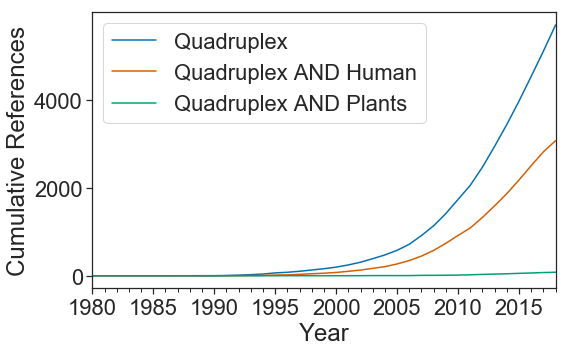

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))

refs.cumsum().plot(ax=ax)
ax.set_ylabel('Cumulative References')
plt.tight_layout()
plt.savefig('pubmed_trends_in_quadruplexes.svg')
plt.show()